In [32]:
import pandas as pd
import numpy as np

In [33]:
rhomis_data = pd.read_csv("data/RHoMIS_Full_Data.csv", engine = "python")
rh_indic = pd.read_csv("data/RHoMIS_Indicators.csv", engine='python')

In [34]:
## final dataset, keep and drop these columns
rhomis_data = rhomis_data[["crop_count", "crop_name_1", "crop_harvest_1", "crop_intercrop_1"]]
rh_indic = rh_indic.drop(['ITERATION','GPS_LAT', 'GPS_LON', 'GPS_ALT', 'Altitude','WorstFoodSecMonth',
       'BestFoodSecMonth','FIES_Score',  'currency_conversion_factor', 'GHGEmissions' ],axis = 1)


In [35]:
def getNAs(df):

    colNames = []
    percentNA = []
    for i in df.columns:
        colNames.append(i)
        numNA = df[i].isna().sum()
        percent = (numNA/len(df))*100
        percentNA.append(percent)
        
    colNames = pd.DataFrame(colNames)
    colNames = colNames.rename(columns={0: "label"})
    percentNA = pd.DataFrame(percentNA)
    percentNA = percentNA.rename(columns={0: "numNA"})
    d = pd.concat([colNames,percentNA], axis = 1).sort_values(by=['numNA'], ascending = False)

        
    return d

In [36]:
def remove_columns(df, threshold_percent):
    '''drop columns by a threshold (percentage of na)'''
    data = getNAs(df)
    column_names = data[data.numNA >= threshold_percent].label
    clean_data = df.drop(column_names, axis = 1)
    
    return clean_data




In [37]:
#convert all categories to lowercase, there is an issue with factor levels of y, n, N, Y for yes/no 
def entry_to_lowercase(df):
    for i in df.columns:
        if (df[i].dtype == "O"):
            df[i] = semi_clean_crop[i].str.lower()
    return df

In [38]:
### identify which are categorical and which are numeric by looking at the factor levels
## create dataframe with variable name, levels, number of categories and data types

def id_data_types(df):
    names = pd.DataFrame()
    category = pd.DataFrame()
    data_type = pd.DataFrame()
    numUni = pd.DataFrame()

    for i in df.columns:
        
        names = names.append({"variable": i},ignore_index = True)
        category = category.append({"category": list(df[i].unique())}, ignore_index = True)
        numUni = numUni.append({"numUnique": len(df[i].unique())}, ignore_index = True)
        data_type = data_type.append({"data_type": df[i].dtype}, ignore_index = True)
    
    view_data = pd.concat([names, category, numUni,data_type],axis =1)
    
    return (view_data)

In [39]:
def replace_na_with_NaN(df):
    for i in df.columns:
        df[i] = df[i].replace('na', np.NaN)
    return df


In [40]:
bigData  = pd.concat([rhomis_data,rh_indic ],axis = 1)
bigData
### replace NaN with na
#bigData = bigData.fillna("na")

,crop_count,crop_name_1,crop_harvest_1,crop_intercrop_1,ID_PROJ,ID_COUNTRY,YEAR,SURVEY_ID,ID_HH,Country,...,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl,NFertInput
0,na,groundnut,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_1_1,Tanzania,...,38.500640,0.000000,1.000000,0.049505,3650.565755,0.000000,0,0.000000,1.000000,NaN
1,na,millet,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_2_1,Tanzania,...,0.000000,0.000000,1.000000,0.000000,3632.448997,0.000000,4,0.499999,0.500001,75.0
2,na,groundnut,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_3_1,Tanzania,...,128.335467,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,1.000000,0.000000,20.0
3,na,cowpea,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_4_1,Tanzania,...,0.000000,0.000000,NaN,NaN,257.234727,257.234727,0,NaN,NaN,15.0
4,na,sesame,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_5_1,Tanzania,...,233.994961,23.102694,0.931377,0.695041,925.310354,22.070240,0,1.000000,0.000000,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,3,maize,good_harvest,monoculture,TA7,GH,2018,GH_TA7_2018,GH_2018_TA7_387_1,Ghana,...,655.292919,0.000000,1.000000,0.779661,1615.869392,339.743848,7,0.629176,0.370824,3.0
13306,5,maize,good_harvest,monoculture,TA7,GH,2018,GH_TA7_2018,GH_2018_TA7_388_1,Ghana,...,0.000000,0.000000,NaN,NaN,355.648536,355.648536,5,1.000000,0.000000,3.0
13307,2,maize,bad_harvest,intercrop,TA7,GH,2018,GH_TA7_2018,GH_2018_TA7_389_1,Ghana,...,49.859244,0.000000,0.456522,0.456522,379.050204,276.284247,0,0.000000,1.000000,50.0
13308,2,maize,bad_harvest,intercrop,TA7,GH,2018,GH_TA7_2018,GH_2018_TA7_390_1,Ghana,...,0.000000,0.000000,NaN,NaN,693.504198,693.504198,0,1.000000,0.000000,200.0


In [41]:
getNAs(bigData).head(3)

,label,numNA
10,Region,85.537190
46,NFertInput,57.776108
15,LandOwned,31.547708


In [42]:
bigData = remove_columns(bigData, 50)
bigData.head(3)

,crop_count,crop_name_1,crop_harvest_1,crop_intercrop_1,ID_PROJ,ID_COUNTRY,YEAR,SURVEY_ID,ID_HH,Country,...,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl
0,na,groundnut,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_1_1,Tanzania,...,38.500640,38.500640,0.0,1.0,0.049505,3650.565755,0.0,0,0.000000,1.000000
1,na,millet,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_2_1,Tanzania,...,0.000000,0.000000,0.0,1.0,0.000000,3632.448997,0.0,4,0.499999,0.500001
2,na,groundnut,na,na,CFM,TZ,2015,TZ_CFM_2015,TZ_2015_CFM_3_1,Tanzania,...,128.335467,128.335467,0.0,1.0,0.129870,5314.779021,1750.0,1,1.000000,0.000000


In [43]:
bigData = replace_na_with_NaN(bigData)
bigData.dtypes

crop_count                                       object
crop_name_1                                      object
crop_harvest_1                                   object
crop_intercrop_1                                 object
ID_PROJ                                          object
ID_COUNTRY                                       object
YEAR                                              int64
SURVEY_ID                                        object
ID_HH                                            object
Country                                          object
HHsizemembers                                     int64
HHsizeMAE                                       float64
HouseholdType                                    object
Head_EducationLevel                              object
LandOwned                                       float64
LandCultivated                                  float64
LivestockHoldings                               float64
NrofMonthsFoodInsecure                          

In [44]:
a = bigData.select_dtypes('object')
id_data_types(a.select_dtypes('object'))

,variable,category,numUnique,data_type
0,crop_count,"[nan, 1, 2, 3, 5, 4, 6, 7, 8, 0, 10]",11.0,object
1,crop_name_1,"[groundnut, millet, cowpea, sesame, other vege...",76.0,object
2,crop_harvest_1,"[nan, bad_harvest, normal_harvest, good_harvest]",4.0,object
3,crop_intercrop_1,"[nan, intercrop, monoculture]",3.0,object
4,ID_PROJ,"[CFM, S4N, CW1, CW2, CFG, CM1, CM2, SIL, CM3, ...",28.0,object
5,ID_COUNTRY,"[TZ, GT, SV, HN, ML, BF, MW, KE, IN, KH, VN, L...",21.0,object
6,SURVEY_ID,"[TZ_CFM_2015, GT_S4N_2015, SV_S4N_2015, HN_S4N...",36.0,object
7,ID_HH,"[TZ_2015_CFM_1_1, TZ_2015_CFM_2_1, TZ_2015_CFM...",13310.0,object
8,Country,"[Tanzania, Guatemala, Honduras, El_Salvador, M...",21.0,object
9,HouseholdType,"[single, together, workaway, nan, nonparenthea...",14.0,object


In [73]:
#clean out the weird head education levels 

#bigData.loc[bigData['Head_EducationLevel'] == [['primary', 'illiterate', 'secondary', 'literate', 'no_school','adult_education', 'no school','adult education, literacy school or parish school''postsecondary', 'informal', 'No_school', 'none','religious_school', 'islamic_school']]]

array = ['primary', 'illiterate', 'secondary', 'literate', 'no_school','adult_education', 'no school','adult education, literacy school or parish school''postsecondary', 'informal', 'No_school' , 'none','religious_school', 'islamic_school']
bigData_test1 = bigData.loc[(bigData['Head_EducationLevel'].isin(array))]
bigData_test1.shape

(12193, 46)

In [74]:
array2 = ['primary', 'secondary','illiterate','literate','adult_education','no_school', 'no school','informal', 'postsecondary', 'No_school' , 'none']
bigData = bigData.loc[(bigData['Head_EducationLevel'].isin(array2))]
bigData_test2.shape

(11962, 46)

In [75]:
bigData["continent"] = 0
bigData['Country'].unique()

array(['Tanzania', 'Guatemala', 'Honduras', 'El_Salvador', 'Mali',
       'Burkina_Faso', 'Malawi', 'Kenya', 'India', 'Cambodia', 'Vietnam',
       'LaoPDR', 'Ethiopia', 'DRC', 'Zambia', 'Ghana', 'Uganda',
       'Costa_Rica', 'Burundi', 'Peru', 'Nicaragua'], dtype=object)

In [76]:
bigData.continent[bigData.Country == 'Tanzania'] = "africa"
bigData.continent[bigData.Country == "Guatemala"] = "central_america"
bigData.continent[bigData.Country == "Honduras"] = "central_america"
bigData.continent[bigData.Country == "El_Salvador"] = "central_america"
bigData.continent[bigData.Country == "Mali"] = "africa"
bigData.continent[bigData.Country == "Burkina_Faso"] = "africa"
bigData.continent[bigData.Country == "Malawi"] = "africa"
bigData.continent[bigData.Country == "Kenya"] = "africa"
bigData.continent[bigData.Country == "India"] = "asia"
bigData.continent[bigData.Country == "Cambodia"] = "asia"
bigData.continent[bigData.Country == "Vietnam"] = "asia"
bigData.continent[bigData.Country == "LaoPDR"] = "asia"
bigData.continent[bigData.Country == "Ethiopia"] = "africa"
bigData.continent[bigData.Country == "DRC"] = "africa"
bigData.continent[bigData.Country == "Zambia"] = "africa"
bigData.continent[bigData.Country == "Ghana"] = "africa"
bigData.continent[bigData.Country == "Uganda"] = "africa"
bigData.continent[bigData.Country == "Costa_Rica"] = "central_america"
bigData.continent[bigData.Country == "Burundi"] = "africa"
bigData.continent[bigData.Country == "Peru"] = "south_america"
bigData.continent[bigData.Country == "Nicaragua"] = "central_america"

<ipython-input-76-86fb44a484d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigData.continent[bigData.Country == 'Tanzania'] = "africa"
<ipython-input-76-86fb44a484d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigData.continent[bigData.Country == "Guatemala"] = "central_america"
<ipython-input-76-86fb44a484d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigData.continent[bigData.Country == "Honduras"] = "central_americ

In [77]:
# Write to CSV: only needs to be run once.
bigData.to_csv("data/clean.csv", encoding='utf-8', index=False)

In [78]:
## need to fix crop count
bigData.shape

(11962, 46)

In [51]:
# semi_clean_cropbigData = semi_clean_crop.drop(["ITERATION"], axis = 1) ## survey taken only once for all responders
# semi_clean_crop =  semi_clean_crop.drop(["GPS_LAT"], axis = 1)
# semi_clean_crop = semi_clean_crop.drop(["GPS_LON"], axis = 1)
# semi_clean_crop = semi_clean_crop.drop(["GPS_ALT"], axis = 1)

In [52]:
# categ_crop_data = pd.DataFrame(semi_clean_crop.select_dtypes(include=['object']))
# categ_crop_data = entry_to_lowercase(categ_crop_data)



#check the crop frequencies to make sure that crop names is cleaned correctly


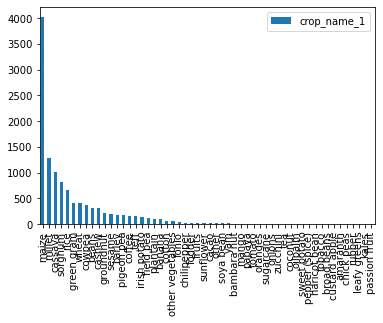

In [120]:
crop_frequencies = bigData["crop_name_1"].value_counts()
frame = pd.DataFrame(crop_frequencies)
frame1 = frame.loc[frame["crop_name_1"]>1]
#frame.to_csv("data/cropfreq.csv", encoding='utf-8', index=False)
ax = frame1.plot.bar()